In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
iris = load_iris() #formatting data as input for different models 
input_features = np.array(iris.data)
lrinput_features1 = input_features[:,:2]
lrinput_features2 = input_features[:,2:]

ldainput_features1 = input_features[:,:2]
ldainput_features2 = input_features[:,2:]
target = np.array(iris.target)

In [2]:
class LogisticRegression:
    def __init__(self,inputs,output):
        #splitting data for training and testing
        x_train,x_test,y_train,y_test=train_test_split(inputs,output,test_size=0.1,random_state=54)
        #Sending training data to train with the features
        self.fit(x_train,y_train)
        #predicting with test data as input
        pred = self.predict(x_test)
        #printing accuracy score of the prediction with actual values
        print(accuracy_score(y_test, pred)*100)
        
    def fit(self,itrain,otrain):
        #adding a coloumn of 1's to match with the size of weight matrix
        itrain = np.insert(itrain, 0, 1, axis=1)
        theta = np.zeros(len(itrain[0]))              #weight matrix
        for i in range(1000):                         #1000 epochs      
            h = []
            for k,x in enumerate(itrain):
                pred = np.dot(theta, x.T)
                h.append(pred)
            error = h - otrain
            error = 0.0001 * error
            theta = theta - error.T.dot(itrain)       #updating weights for better prediction
        self.theta = theta
    def predict(self,x):
        x = np.insert(x, 0, 1, axis=1)                 #adding a coloumn of 1's to match with the size of weight matrix
        pred = np.dot(self.theta, x.T)                 #multiplying weights with input features to predict
        return np.round(pred)

In [3]:
class LDA:
    def __init__(self,inputs,output):
        #splitting data for training and testing
        x_train,x_test,y_train,y_test=train_test_split(inputs,output,test_size=0.1,random_state=54)
        self.fit(x_train,y_train)                    #Sending training data to train with the features
        pred = self.predict(x_test)                  #predicting with test data as input
        print(accuracy_score(y_test, pred)*100)      #printing accuracy score of the prediction with actual values
        
    def fit(self,itrain,otrain):
        s = len(itrain[0])
        mean = np.zeros((3,s))                       #mean matrix of input features for each class
        m = np.zeros(s)                              #overall mean matrix of input features
        for i in range(len(otrain)):
            mean[otrain[i]] = mean[otrain[i]] + itrain[i]
            m = m + itrain[i]
        mean[0] = mean[0] / np.count_nonzero(otrain == 0)
        mean[1] = mean[1] / np.count_nonzero(otrain == 1)
        mean[2] = mean[2] / np.count_nonzero(otrain == 2)
        m = m / len(itrain)
        w = [[],[],[]]                                               #calculating within class scatter matrix
        for i in range(len(otrain)):
            v = (itrain[i] - mean[otrain[i]]).reshape(len(itrain[0]),1)
            w[otrain[i]].append(v.dot(v.T))
        p = mean-m
        b = []                                                       #calculating between class scatter matrix
        for i in range(len(p)):
            if i == 0:
                b.append(np.count_nonzero(otrain == i)*(p[i].reshape(s,1).dot(p[i].reshape(s,1).T)))
            else:
                b = b + np.count_nonzero(otrain == i)*(p[i].reshape(s,1).dot(p[i].reshape(s,1).T))
        bc = b                                                       #bc is between class scatter matrix 
        self.cov = []
        self.cov.append(sum(w[0]))
        self.cov.append(sum(w[1]))
        self.cov.append(sum(w[2]))
        self.cov = sum(self.cov)/len(itrain)
        wc = self.cov                                                #wc is within class scatter matrix
        cov = np.linalg.inv(wc.reshape(s,s)).dot(bc.reshape(s,s))    #finding eig values and vectors
        val,vec = np.linalg.eig(cov)
        self.vec = vec[0]                                            #using eig vector as weights
        
    def predict(self,x):
        pred = np.dot(self.vec, x.T)                                 #multiplying weights with input features to predict
        return np.round(pred)

In [4]:
print("Accuracy for all features in LogisticRegression = ")
LogisticRegression(input_features,target)
print("\nAccuracy for sepal length and sepal width in LogisticRegression = ")
log1 = LogisticRegression(lrinput_features1,target)
print("\nAccuracy for petal length and petal width in LogisticRegression = ")
log2 = LogisticRegression(lrinput_features2,target)
print("\nAccuracy for all features in LDA = ")
LDA(input_features,target)
print("\nAccuracy for sepal length and sepal width in LDA = ")
ld1 = LDA(ldainput_features1,target)
print("\nAccuracy for petal length and petal width in LDA = ")
ld2 = LDA(ldainput_features2,target)

Accuracy for all features in LogisticRegression = 
100.0

Accuracy for sepal length and sepal width in LogisticRegression = 
80.0

Accuracy for petal length and petal width in LogisticRegression = 
100.0

Accuracy for all features in LDA = 
93.33333333333333

Accuracy for sepal length and sepal width in LDA = 
0.0

Accuracy for petal length and petal width in LDA = 
40.0


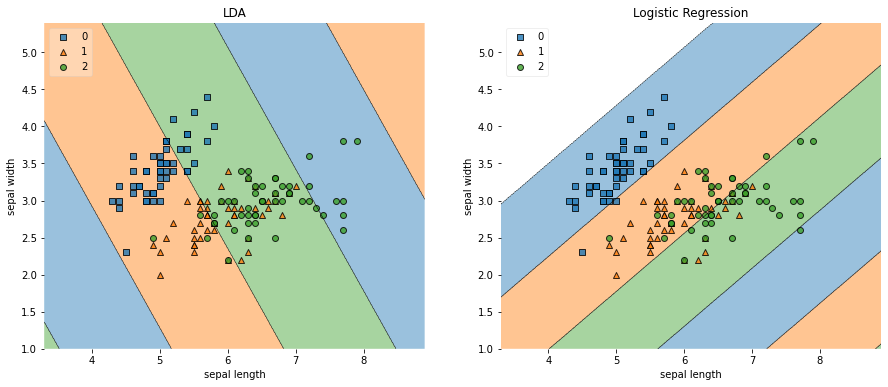

In [5]:
plt.figure(figsize=(15, 6))            #plotting for prediction values of both models with sepal length and sepal width as input
plt.subplot(1,2,1)
plot_decision_regions(X=ldainput_features1, y=target, clf=ld1, legend=2)
plt.title('LDA')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.subplot(1,2,2)
plot_decision_regions(X=lrinput_features1, y=target, clf=log1, legend=2)
plt.title('Logistic Regression')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

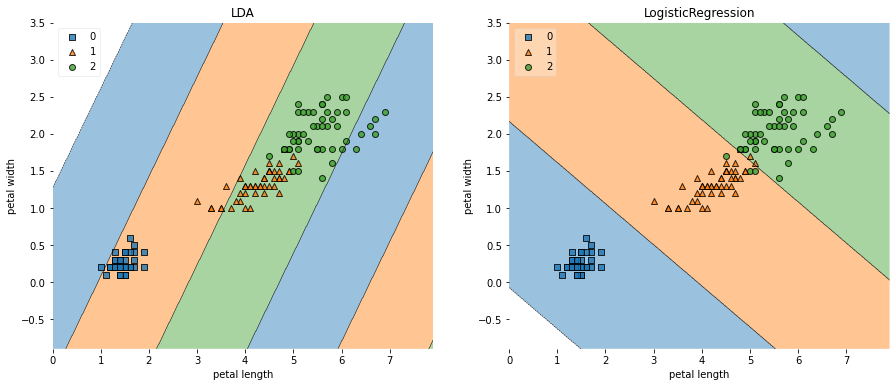

In [6]:
plt.figure(figsize=(15, 6))       #plotting for prediction values of both models with petal length and petal width as input
plt.subplot(1,2,1)
plot_decision_regions(X=ldainput_features2, y=target, clf=ld2, legend=2)
plt.title('LDA')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.subplot(1,2,2)
plot_decision_regions(X=lrinput_features2, y=target, clf=log2, legend=2)
plt.title('LogisticRegression')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()